# Actividad 1 - Carlos Pulido Rosas

## Estadistica Descriptiva

# Import Libraries

In [41]:
import kagglehub
import pandas as pd
import numpy as np
import os
import zipfile
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import skew
from kagglehub import KaggleDatasetAdapter


# Import the Dataset

Dataset Info

URL: https://www.kaggle.com/datasets/katerynameleshenko/ai-index/data

Indicator Documentation: https://www.tortoisemedia.com/data/global-ai#rankings

Tesis Title: Development of a Model to Estimate the Probability of AI Job Substitution in Jalisco

In [27]:
# Download the dataset from Kaggle
path = kagglehub.dataset_download("katerynameleshenko/ai-index")
print("Dataset descargado en:", path)

# List files in the downloaded folder
print("Archivos disponibles:", os.listdir(path))

# Unzip file
zip_files = [f for f in os.listdir(path) if f.endswith(".zip")]
if zip_files:
    zip_path = os.path.join(path, zip_files[0])
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(path)
    print("Archivos después de extraer:", os.listdir(path))

# Look for CSV files
csv_files = [f for f in os.listdir(path) if f.endswith(".csv")]
if not csv_files:
    raise FileNotFoundError("No se encontró ningún archivo CSV en la carpeta del dataset.")

# Load the first CSV file found
file_path = os.path.join(path, csv_files[0])
print("Usando archivo:", file_path)

# Load the dataset into a DataFrame
df = pd.read_csv(file_path)


Dataset descargado en: C:\Users\carlo\.cache\kagglehub\datasets\katerynameleshenko\ai-index\versions\1
Archivos disponibles: ['AI_index_db.csv']
Usando archivo: C:\Users\carlo\.cache\kagglehub\datasets\katerynameleshenko\ai-index\versions\1\AI_index_db.csv


# Context of the Problem

Artificial Intelligence (AI) is transforming economies worldwide; however, not all countries are equally prepared to adopt and benefit from these technologies. This analysis seeks to address the following question:

# Are there significant differences in AI readiness (Total Score) between countries and across regions?

In [29]:
# Select relevant columns and drop rows with missing values
data = df[['Total score', 'Region']].dropna()

# Global descriptive statistics
print("📊 Global Descriptive Statistics for Total Score:")
print(data['Total score'].describe(), "\n")

# Descriptive statistics by region
region_stats = (
    data
    .groupby('Region')['Total score']
    .agg(['mean', 'median', 'std', 'count'])
    .reset_index()
    .rename(columns={
        'mean': 'Mean',
        'median': 'Median',
        'std': 'Std Dev',
        'count': 'Countries'
    })
)

print("📊 Descriptive Statistics by Region:")
print(region_stats, "\n")


📊 Global Descriptive Statistics for Total Score:
count     62.000000
mean      23.914677
std       15.123586
min        0.000000
25%       14.805000
50%       23.220000
75%       30.487500
max      100.000000
Name: Total score, dtype: float64 

📊 Descriptive Statistics by Region:
         Region       Mean  Median    Std Dev  Countries
0        Africa   6.426000   8.870   4.216187          5
1      Americas  29.031250  15.405  30.010409          8
2  Asia-Pacific  25.792143  27.450  16.054658         14
3        Europe  25.493103  25.520   7.326737         29
4   Middle East  19.656667  17.915  12.277478          6 



# Total Score Distribution

The histogram shows the distribution of Total Score in the Artificial Intelligence Index across different countries.

Most countries are concentrated between 10 and 40 points, indicating that AI readiness is still low to medium in much of the world.

Only 2 countries score above 60 points one of them being China with 62.92, and just United States reaches 100 points, highlighting its global leadership.

The distribution is right-skewed, meaning that many countries have low scores, while only a few achieve very high scores.

This result reinforces the idea that there is a marked inequality between regions and countries regarding AI adoption and readiness.

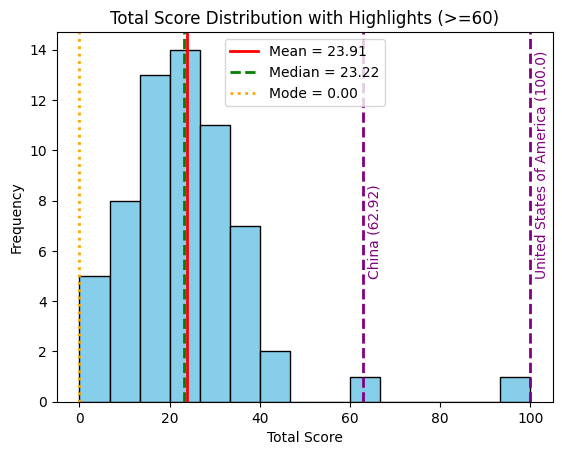

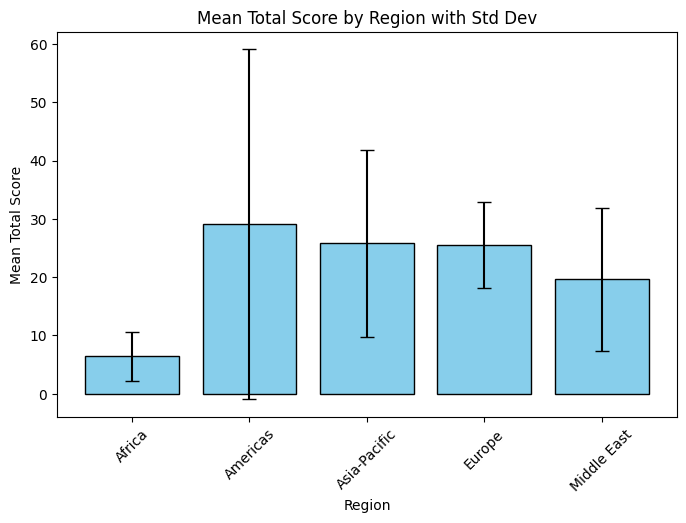

In [48]:
# --- Filter high scoring countries (>= 60) ---
high_scores = df[df['Total score'] >= 60][['Country', 'Total score']]

# --- Prepare scores for stats ---
scores = data['Total score']

mean = scores.mean()
median = scores.median()

# Mode (use scipy.stats with keepdims=True for compatibility)
from scipy import stats
mode_result = stats.mode(scores, keepdims=True)
mode = mode_result.mode[0]

# --- Plot histogram ---
plt.hist(scores, bins=15, color='skyblue', edgecolor='black')

# Add vertical lines for mean, median, mode
plt.axvline(mean, color='red', linestyle='-', linewidth=2, label=f"Mean = {mean:.2f}")
plt.axvline(median, color='green', linestyle='--', linewidth=2, label=f"Median = {median:.2f}")
plt.axvline(mode, color='orange', linestyle=':', linewidth=2, label=f"Mode = {mode:.2f}")

# Add dynamic annotations for countries >= 60
for _, row in high_scores.iterrows():
    score = row['Total score']
    country = row['Country']
    plt.axvline(score, linestyle='--', linewidth=2, color='purple')
    plt.text(score+1, 5, f"{country} ({score})", rotation=90, color='purple')

# Titles and labels
plt.title("Total Score Distribution with Highlights (>=60)")
plt.xlabel("Total Score")
plt.ylabel("Frequency")
plt.legend()
plt.show()

plt.figure(figsize=(8,5))
plt.bar(region_stats['Region'], region_stats['Mean'], 
        yerr=region_stats['Std Dev'], 
        capsize=5, color='skyblue', edgecolor='black')

plt.title("Mean Total Score by Region with Std Dev")
plt.xlabel("Region")
plt.ylabel("Mean Total Score")
plt.xticks(rotation=45)
plt.show()


# Total Score by Region

The boxplot shows how Total Score varies across different world regions:

Africa: The lowest mean (≈6) and very small standard deviation. This means all countries in Africa perform consistently low in AI readiness.

Americas: Highest mean, but also the largest standard deviation. This reflects strong inequality — with the United States at 100 and others much lower.

Asia-Pacific: Intermediate mean with a wide dispersion. Includes China (above 60) but also countries with very low scores.

Europe: Mean around 25–30 with a smaller standard deviation compared to Asia-Pacific and Americas. This shows more homogeneity among European countries.

Middle East: Lower mean (~20) with moderate variability, reflecting some inequality but no extreme leaders.

Conclusion: The Americas and Asia-Pacific show the greatest inequality in AI readiness, driven by countries like the United States and China. Europe is more consistent, while Africa lags behind but with less variability. This reinforces the global digital divide, where only a few nations lead and most regions cluster at lower scores.

# Conclusion

This analysis shows that AI readiness is uneven across regions. The Americas and Asia-Pacific have the strongest outliers, Europe is balanced but lacks leaders, and Africa remains behind. These findings reflect global inequality in AI development and highlight the importance of regional investment and strategy.

📊 Descriptive Statistics by Political Regime:
      Political regime       Mean  Median    Std Dev  Countries
0     Closed autocracy  22.375714  14.660  18.820947          7
1  Electoral autocracy  11.815000  10.745  11.247951          8
2  Electoral democracy  18.447500  18.065   7.958053         20
3    Liberal democracy  31.948519  30.530  15.454128         27 



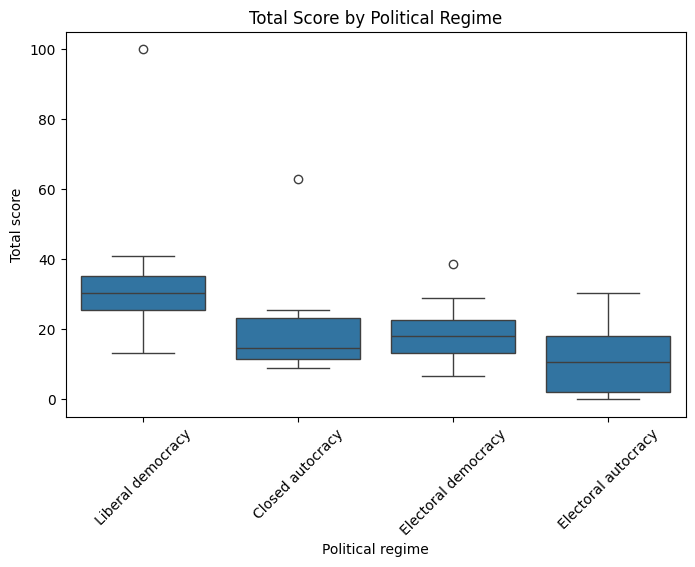

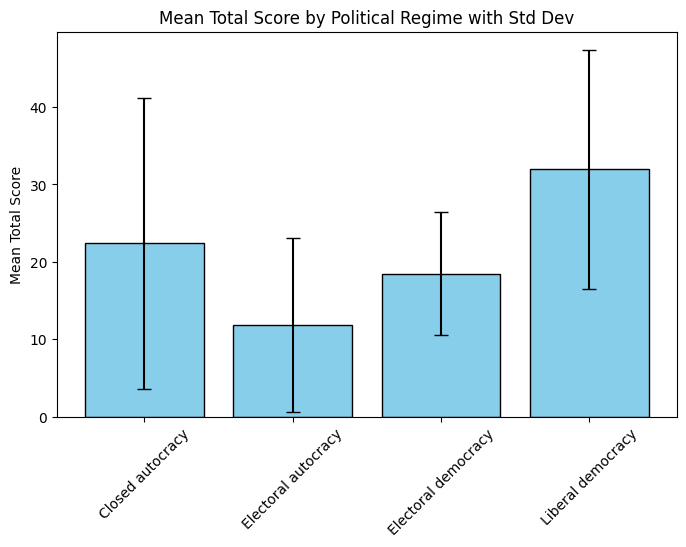

In [46]:
# --- Variables of interest: Political Regime vs Total Score ---
political_data = df[['Total score', 'Political regime']].dropna()

# --- Descriptive statistics by political regime ---
regime_stats = (
    political_data
    .groupby('Political regime')['Total score']
    .agg(['mean', 'median', 'std', 'count'])
    .reset_index()
    .rename(columns={
        'mean': 'Mean',
        'median': 'Median',
        'std': 'Std Dev',
        'count': 'Countries'
    })
)

print("📊 Descriptive Statistics by Political Regime:")
print(regime_stats, "\n")

# --- Boxplot by political regime ---
plt.figure(figsize=(8,5))
sns.boxplot(x='Political regime', y='Total score', data=political_data)
plt.xticks(rotation=45)
plt.title("Total Score by Political Regime")
plt.show()

# --- Bar chart with error bars (mean ± std) ---
plt.figure(figsize=(8,5))
plt.bar(regime_stats['Political regime'], regime_stats['Mean'],
        yerr=regime_stats['Std Dev'], capsize=5,
        color='skyblue', edgecolor='black')
plt.xticks(rotation=45)
plt.title("Mean Total Score by Political Regime with Std Dev")
plt.ylabel("Mean Total Score")
plt.show()


# Total Score by Political Regime

The analysis compares Total Score across different political regimes:

Liberal democracies: These countries tend to have higher and more consistent scores, reflecting stronger institutional frameworks and better technological readiness.

Closed autocracies: Results are more dispersed. Some outliers (e.g., China) achieve relatively high scores, but most countries in this group remain far behind.

Other regimes (anocracies, electoral autocracies, etc.): Their performance is generally in the mid-range, without reaching the top values of liberal democracies.

# Conclusion
Political regime appears to play a role in AI readiness. Liberal democracies concentrate most of the top performers, while autocracies show greater inequality with isolated leaders but overall weaker results.

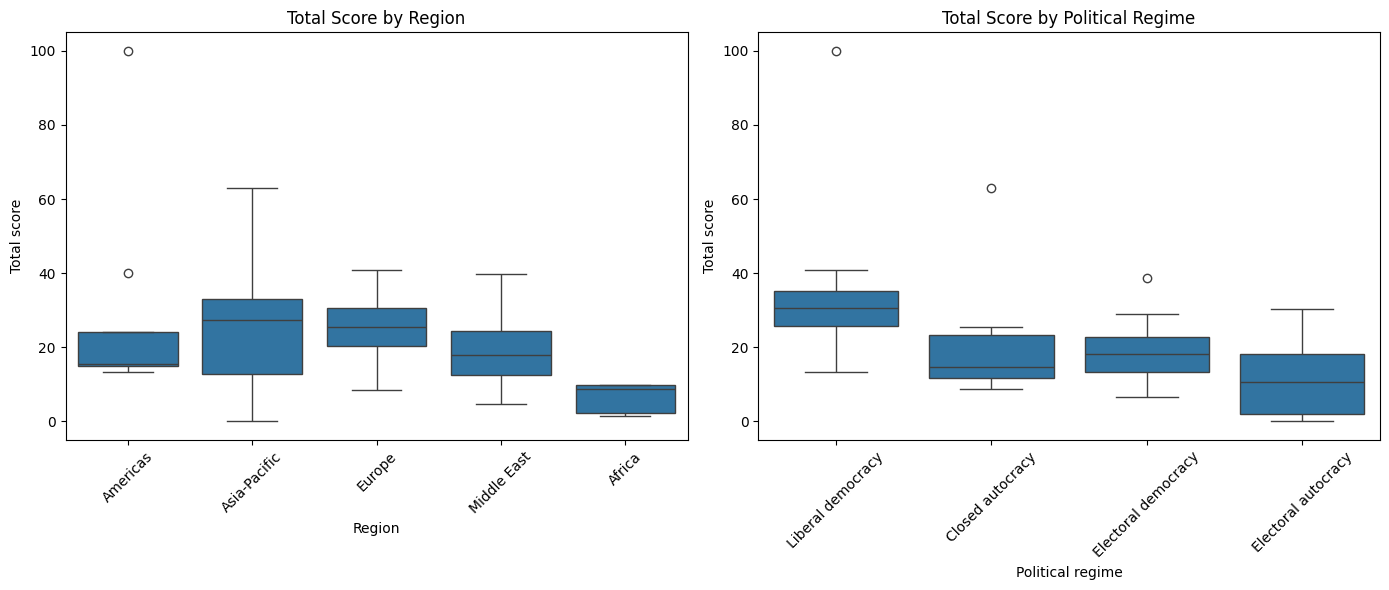

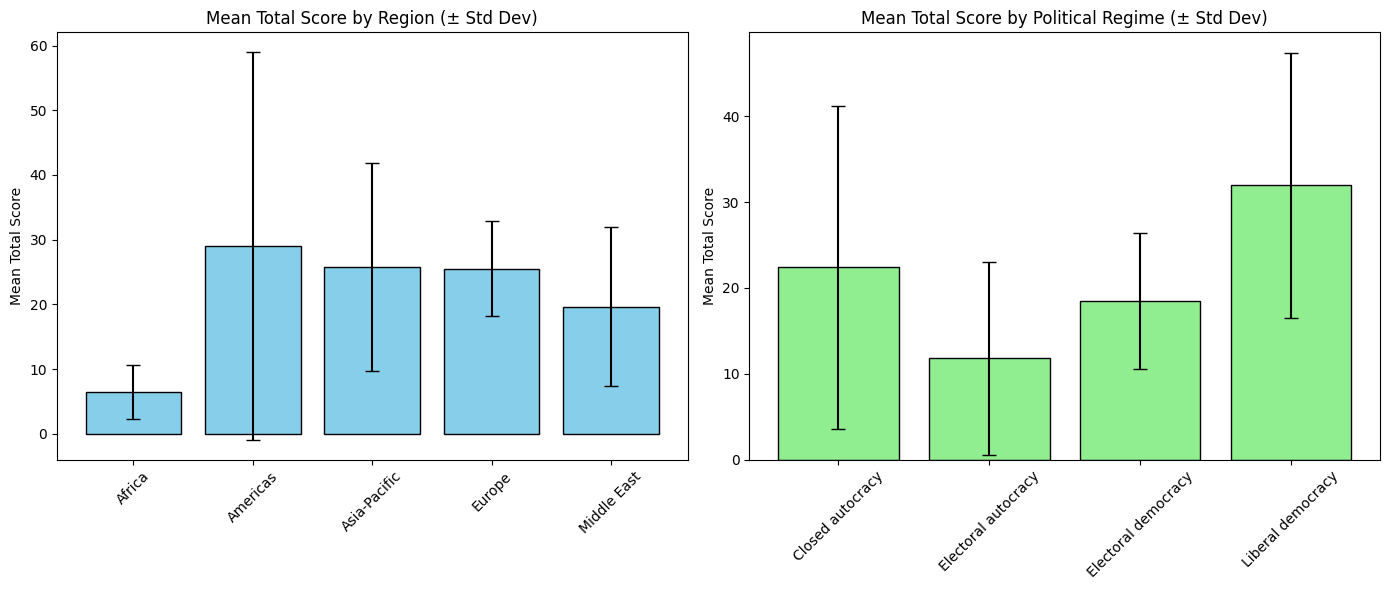

📊 Descriptive Statistics by Region:
         Region       Mean  Median    Std Dev  Countries
0        Africa   6.426000   8.870   4.216187          5
1      Americas  29.031250  15.405  30.010409          8
2  Asia-Pacific  25.792143  27.450  16.054658         14
3        Europe  25.493103  25.520   7.326737         29
4   Middle East  19.656667  17.915  12.277478          6 

📊 Descriptive Statistics by Political Regime:
      Political regime       Mean  Median    Std Dev  Countries
0     Closed autocracy  22.375714  14.660  18.820947          7
1  Electoral autocracy  11.815000  10.745  11.247951          8
2  Electoral democracy  18.447500  18.065   7.958053         20
3    Liberal democracy  31.948519  30.530  15.454128         27


In [51]:

region_data = df[['Total score', 'Region']].dropna()
regime_data = df[['Total score', 'Political regime']].dropna()
region_stats = (
    region_data
    .groupby('Region')['Total score']
    .agg(['mean', 'median', 'std', 'count'])
    .reset_index()
    .rename(columns={'mean':'Mean','median':'Median','std':'Std Dev','count':'Countries'})
)

regime_stats = (
    regime_data
    .groupby('Political regime')['Total score']
    .agg(['mean', 'median', 'std', 'count'])
    .reset_index()
    .rename(columns={'mean':'Mean','median':'Median','std':'Std Dev','count':'Countries'})
)

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.boxplot(x='Region', y='Total score', data=region_data)
plt.xticks(rotation=45)
plt.title("Total Score by Region")

plt.subplot(1,2,2)
sns.boxplot(x='Political regime', y='Total score', data=regime_data)
plt.xticks(rotation=45)
plt.title("Total Score by Political Regime")

plt.tight_layout()
plt.show()

plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.bar(region_stats['Region'], region_stats['Mean'],
        yerr=region_stats['Std Dev'], capsize=5,
        color='skyblue', edgecolor='black')
plt.xticks(rotation=45)
plt.title("Mean Total Score by Region (± Std Dev)")
plt.ylabel("Mean Total Score")

plt.subplot(1,2,2)
plt.bar(regime_stats['Political regime'], regime_stats['Mean'],
        yerr=regime_stats['Std Dev'], capsize=5,
        color='lightgreen', edgecolor='black')
plt.xticks(rotation=45)
plt.title("Mean Total Score by Political Regime (± Std Dev)")
plt.ylabel("Mean Total Score")

plt.tight_layout()
plt.show()

print("📊 Descriptive Statistics by Region:")
print(region_stats, "\n")

print("📊 Descriptive Statistics by Political Regime:")
print(regime_stats)


In [ ]:

contingency = pd.crosstab(df['Region'], df['Political regime'])

print("📊 Contingency Table (Region vs Political Regime):")
print(contingency)


📊 Contingency Table (Region vs Political Regime):
Political regime  Closed autocracy  Electoral autocracy  Electoral democracy  \
Region                                                                         
Africa                           1                    2                    2   
Americas                         0                    0                    4   
Asia-Pacific                     2                    3                    4   
Europe                           0                    2                   10   
Middle East                      4                    1                    0   

Political regime  Liberal democracy  
Region                               
Africa                            0  
Americas                          4  
Asia-Pacific                      5  
Europe                           17  
Middle East                       1  


# Final Conclusion

The results demonstrate that AI readiness (Total Score) is highly uneven across the world. At the regional level, the Americas and Asia-Pacific stand out due to strong outliers such as the United States and China, while Europe shows more balanced mid-range performance and Africa consistently lags behind. At the political regime level, liberal democracies concentrate most of the top performers, while closed autocracies show greater inequality, with a few high-scoring cases but mostly weaker results.

Overall, both geography and political systems shape global AI readiness, reinforcing the existence of a digital divide where only a limited group of countries lead the way.